# **Data Science with Python - Logistic regression and XGBoost**

---



author: Robby Kriegk

e-mail:  robby.kriegk@uni-rostock.de

In [ ]:
from google.colab import files
from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.datasets import fetch_openml
from numpy import array
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBClassifier, plot_tree 

In [ ]:
uploaded = files.upload()

Saving lin vs log.png to lin vs log.png
Saving overfitting.png to overfitting.png
Saving Sensi_Speci.png to Sensi_Speci.png


## Abstract

In this notebook, we will try to understand what **Logistic Regression** and **XGBoosting** is about. To understand these algorithms and concepts, you probably want to know more about **Linear Regression**, **Decision Trees** and **Gradient Boosting**. However, in this notebook we assume that you already know about these topics and to start with our two algorithms we first take a look at the dataset we will use.

So **Logistic Regression** and **XGBoosting** are both algorithms and parts of **Supervised Learning**.
And a well known Dataset for **Supervised Learning** is the **MNIST database** which is really popular for training machine learning algorithms.
It is filled with a huge amount of **handwritten digits**, in fact 70.000. 
But it´s probably not the best to have that much data for training a machine learning model. But what this is about, we going to learn later.






# **Dataset**

The dataset we will use for this case study is the MNIST database. It is a large database of handwritten digits which is often used for training and testing in Machine Learning. It contains 70.000 data as you can see below. 






In [ ]:
mnist = fetch_openml("mnist_784")

In [ ]:
print(mnist.data.shape) 
print(mnist.target.shape)

(70000, 784)
(70000,)


But to have much data isn´t always a good thing. Because to have too much data in **Supervised Learning** than necessary, the model can be **overfitted**.
This means that the model learns "too well" on the given data, so that it will decrease accuracy for the predicted data. At the graphic below you can see that problem visualized. The black line represents a well regularized model while the green line represents a overfitted model which will probably has a higher errorrate. Later in this notebook we going to find out more about that problem and how to avoid it.

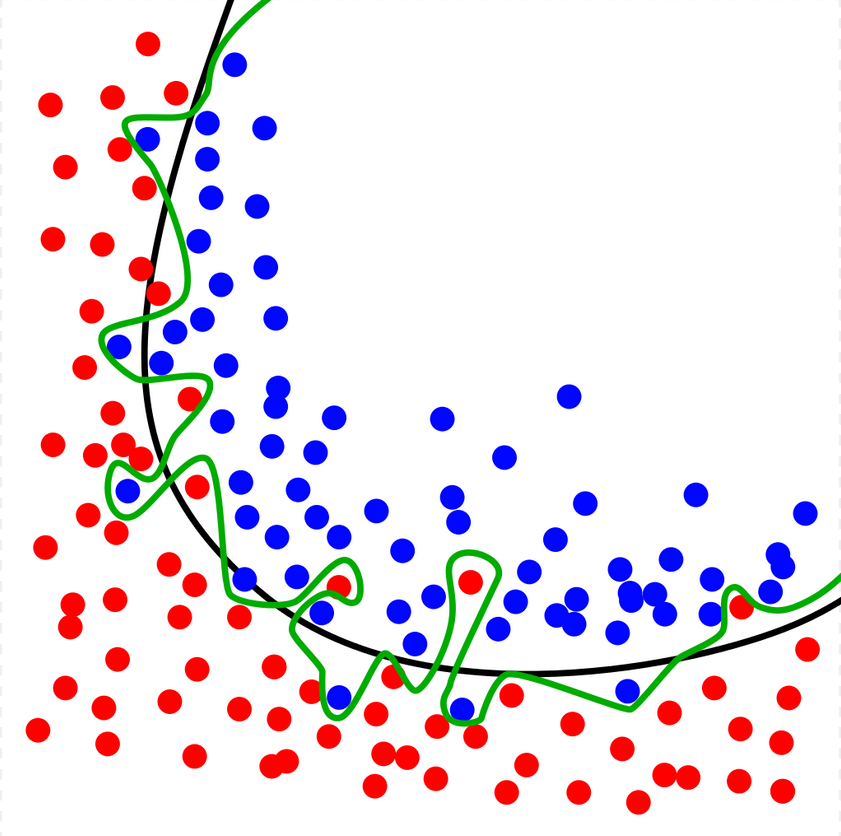

In [ ]:
Image('overfitting.png', width=350)

But now let´s start with manipulating the dataset to use it for our algorithms.
First we´re going to split the data in **training data**(60.000) and **test data**(10.000).

In [ ]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0) 

In [ ]:
print(train_img.shape)
print(train_lbl.shape)
print(test_img.shape)
print(test_lbl.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


To illustrate the data better, you can see it below as a bar chart.

Text(0.5, 1.0, 'Labels in MNIST 784 dataset')

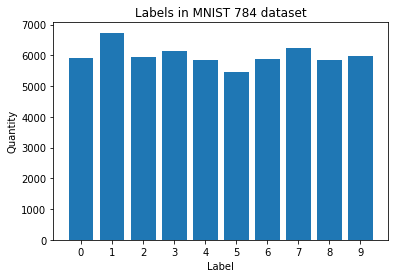

In [ ]:
unique, counts = np.unique(train_lbl, return_counts=True)
plt.bar(unique, counts)
plt.xticks(unique)
plt.xlabel("Label")
plt.ylabel("Quantity")
plt.title("Labels in MNIST 784 dataset")

Below illustrated with **train_img** is the dataset as a table with 'pixel1' to 'pixel784' as x-axis (dimensions) and **train_lbl** as y-axis with the true values.

In [ ]:
train_img

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
28926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_lbl

28926    7
9080     3
52804    0
28094    1
46585    2
        ..
21243    7
45891    8
42613    7
43567    1
68268    1
Name: class, Length: 60000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

The code below transforms the data to an array with the algorithm can work with.

In [ ]:
Xtrain = array(train_img)
ytrain = array(train_lbl)
Xtest = array(test_img)
ytest = array(test_lbl)

At the end a few examples of the data from the table above:
The first 5 labels of the trainingdata 28926, 9080, 52804, 28094 and 46585 with the given numbers.

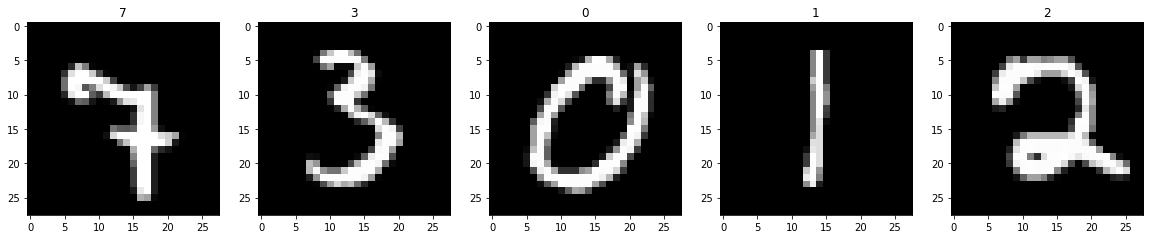

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(Xtrain[0:5], ytrain[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)

 lblTitle = ytrain[index]
 plt.title(lblTitle)

# **Logistic Regression**

You maybe know **Linear Regression**. It is a way to make continuing predictions. That means you have one ore more features in your dataset and the linear Regression model can find the desired variable which can has any numeric value.


Imagine you dont want to predict a numeric value but a classification of for example "yes or no", "true or false" or "1 or 0". Therefore you can use a classification algorithm like **Logistic Regression**.

The  **Logistic Regression** is build on **Linear Regression**.It classifies the data in different parts lets say in "yes or no". With our training set it builds binary models for every number like "row 28926 is seven, row 9080 is not". After that it calculate the **likelihood** for every row and multiply it to the **maximum liklihood**. That´s where we get the s-curve from. To classify the new data from the testing set, the algorithm uses the **Sigmoid Function**

\begin{align} y=\frac{1}{(1+\mathrm{e}^{-t})}\end{align}

 to transform the data into values between 0 and 1 to fit them into the logistic function. Because the logistic regression model is build of the linear Model, it also can handle multiple features which is need in our dataset. As we can see in the dataset table, we have 784 dimensions for our algorithm and for each number which can be predicted the model decides that the row is or is not a number between 0 and 9.



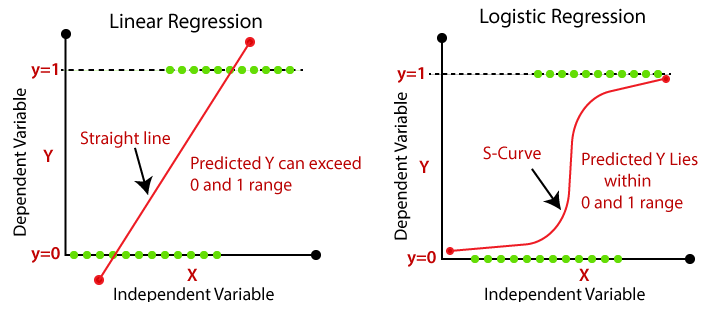

In [ ]:
Image('lin vs log.png')

There is a lot more math going on in the algorithm but for now let´s build a model for our dataset and get back to the topic: overfitting. In the code below we build 5 different models with different iterations made. We would consider that more iterations are better for the learning of the model. So, that´s true for for the training dataset which is given. But the more our model fit the training dataset the more it can happen that it fails for the testing dataset because of fitting the training data to well(remember the graphic back in the notebook). To show that with an actual model, we build 5 models with different iterations and see which performs best for our dataset.

In [ ]:
logReg1 = LogisticRegression(solver = 'lbfgs', max_iter= 10.000)
logReg2 = LogisticRegression(solver = 'lbfgs', max_iter= 50.000)
logReg3 = LogisticRegression(solver = 'lbfgs', max_iter= 90.000)
logReg4 = LogisticRegression(solver = 'lbfgs', max_iter= 100.000)
logReg5 = LogisticRegression(solver = 'lbfgs', max_iter= 300.000)

In [ ]:
logReg1.fit(Xtrain, ytrain)
logReg2.fit(Xtrain, ytrain)
logReg3.fit(Xtrain, ytrain)
logReg4.fit(Xtrain, ytrain)
logReg5.fit(Xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(max_iter=300.0)

In [ ]:
score = logReg1.score(Xtest, ytest)
print('10.000 iterations: ', score*100)
score = logReg2.score(Xtest, ytest)
print('50.000 iterations: ', score*100)
score = logReg3.score(Xtest, ytest)
print('90.000 iterations: ', score*100)
score = logReg4.score(Xtest, ytest)
print('100.000 iterations:', score*100)
score = logReg5.score(Xtest, ytest)
print('300.000 iterations:', score*100)

10.000 iterations:  88.68
50.000 iterations:  91.64
90.000 iterations:  91.93
100.000 iterations: 91.84
300.000 iterations: 91.64


The math is done and we can see that the smallest amount of iterations brings the worst accuracy. But what we also can see is that the biggest amount of iterations did not bring the best accuracy points. That´s because the overfitting is to much effected on the training data, so it has to much errors on the test data. If we would do even more iterations the accuracy score would decrease even more.

But let´s go on now with our model and the predictions it can make. 
The model predict our test data with a pretty solid precision of about 91,5%.
We will illustrate that below in a confusion matrix.

In [ ]:
wholePredict = logReg3.predict(Xtest)

In [ ]:
cm = metrics.confusion_matrix(ytest, wholePredict)
print(cm)

[[ 970    0    1    1    2    9    6    2    5    0]
 [   0 1114    6    2    1    5    0    5    6    2]
 [   4   13  925   20   12    1   15   10   35    5]
 [   2    5   36  891    0   28    3   11   24   13]
 [   1    2    5    0  902    1   11    9    6   25]
 [   8    2    7   31    9  751   12    6   28    9]
 [   8    3    7    0   11   16  939    2    3    0]
 [   3    4   13    4   11    2    1  982    4   40]
 [   4   17   10   18    7   27    8    2  860   10]
 [   5    4    5   11   34    9    1   32    9  859]]


The code below does the same job as the code for the confusion matrix above but it is for the better readability.

What we see are the predicted labels on the x-axis and the actual labels on the y-axis so we can read how often the model was right or wrong. For example lets take the label 3. As we can see, 891 times the model predicted the 3 right and in sum of 87 times it predicted it wrong. This will be important for comparing the model with other models later.  

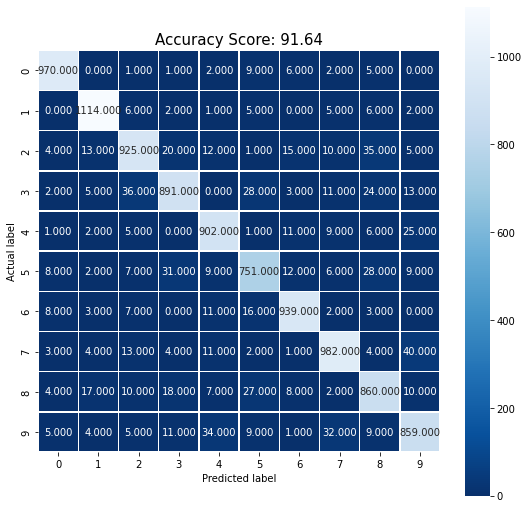

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score*100)
plt.title(all_sample_title, size = 15);

What we can also do is to plot single predictions or groups of predictions which we can see in the code below.

In [ ]:
logReg3.predict(Xtest[0].reshape(1,-1))

array(['0'], dtype=object)

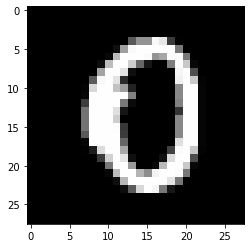

In [ ]:
plt.imshow(np.reshape(Xtest[0], (28,28)), cmap=plt.cm.gray)

We notice that 0 was predict and see that the prediction was right.

**Now with more predictions:**

In [ ]:
logReg3.predict(Xtest[0:5])

array(['0', '4', '1', '2', '4'], dtype=object)

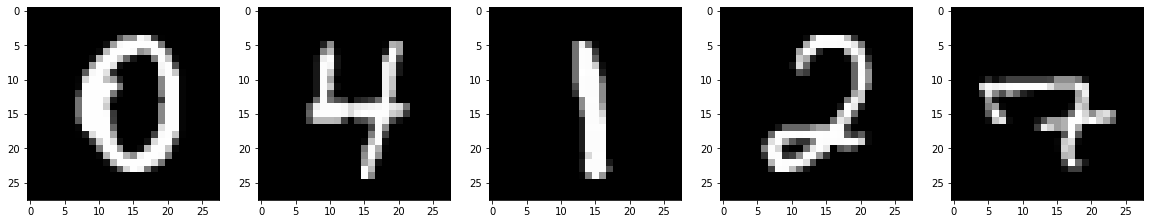

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(Xtest[0:5], ytest[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)

We take the 5 first numbers from the test dataset and predict them. As we can see, the model works good on the first 4 numbers but make a mistake at the fifth. 

Now lets prove the 91,5% accuray of the model and lets do a test with 10*10 predictions:

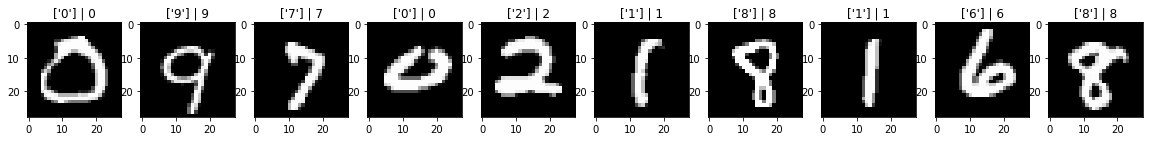

In [ ]:
from random import randint
plt.figure(figsize=(20,4))
for i in range(10):
  _index = randint(0, len(Xtest))
  _label = ytest[_index]
  _img = Xtest[_index]

  plt.subplot(1, 10, i + 1)
  _res = logReg4.predict([_img.reshape(28*28)])
  plt.title(f"{_res} | {_label}")
  plt.imshow(np.reshape(_img, (28,28)), cmap=plt.cm.gray)


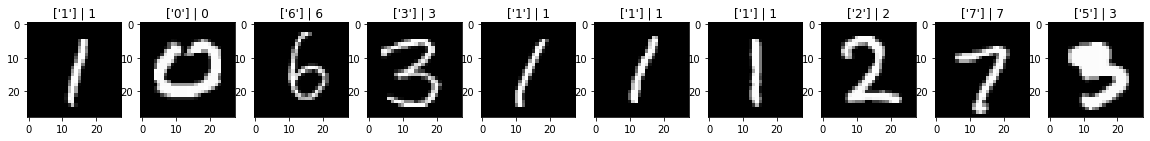

In [ ]:
from random import randint
plt.figure(figsize=(20,4))
for i in range(10):
  _index = randint(0, len(Xtest))
  _label = ytest[_index]
  _img = Xtest[_index]

  plt.subplot(1, 10, i + 1)
  _res = logReg4.predict([_img.reshape(28*28)])
  plt.title(f"{_res} | {_label}")
  plt.imshow(np.reshape(_img, (28,28)), cmap=plt.cm.gray)

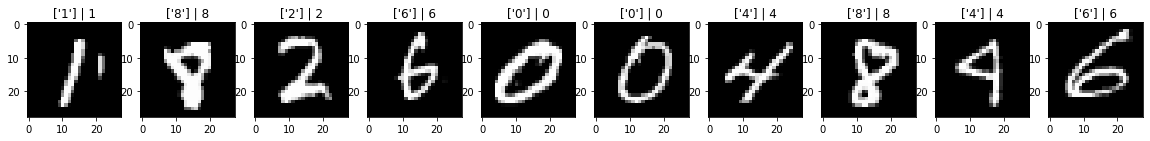

In [ ]:
from random import randint
plt.figure(figsize=(20,4))
for i in range(10):
  _index = randint(0, len(Xtest))
  _label = ytest[_index]
  _img = Xtest[_index]

  plt.subplot(1, 10, i + 1)
  _res = logReg4.predict([_img.reshape(28*28)])
  plt.title(f"{_res} | {_label}")
  plt.imshow(np.reshape(_img, (28,28)), cmap=plt.cm.gray)

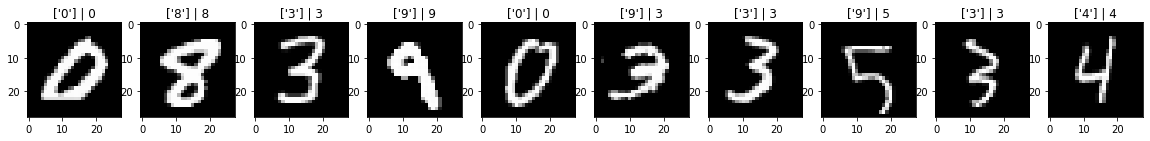

In [ ]:
from random import randint
plt.figure(figsize=(20,4))
for i in range(10):
  _index = randint(0, len(Xtest))
  _label = ytest[_index]
  _img = Xtest[_index]

  plt.subplot(1, 10, i + 1)
  _res = logReg4.predict([_img.reshape(28*28)])
  plt.title(f"{_res} | {_label}")
  plt.imshow(np.reshape(_img, (28,28)), cmap=plt.cm.gray)

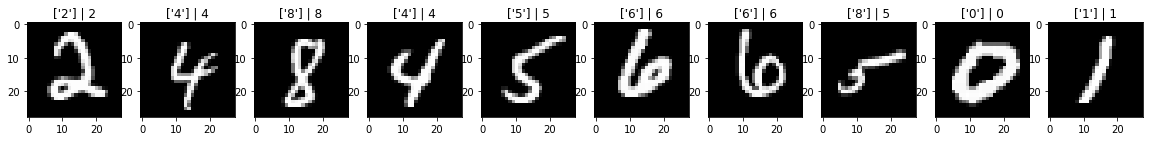

In [ ]:
from random import randint
plt.figure(figsize=(20,4))
for i in range(10):
  _index = randint(0, len(Xtest))
  _label = ytest[_index]
  _img = Xtest[_index]

  plt.subplot(1, 10, i + 1)
  _res = logReg4.predict([_img.reshape(28*28)])
  plt.title(f"{_res} | {_label}")
  plt.imshow(np.reshape(_img, (28,28)), cmap=plt.cm.gray)

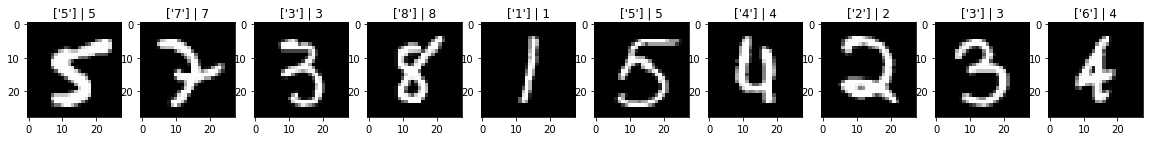

In [ ]:
from random import randint
plt.figure(figsize=(20,4))
for i in range(10):
  _index = randint(0, len(Xtest))
  _label = ytest[_index]
  _img = Xtest[_index]

  plt.subplot(1, 10, i + 1)
  _res = logReg4.predict([_img.reshape(28*28)])
  plt.title(f"{_res} | {_label}")
  plt.imshow(np.reshape(_img, (28,28)), cmap=plt.cm.gray)

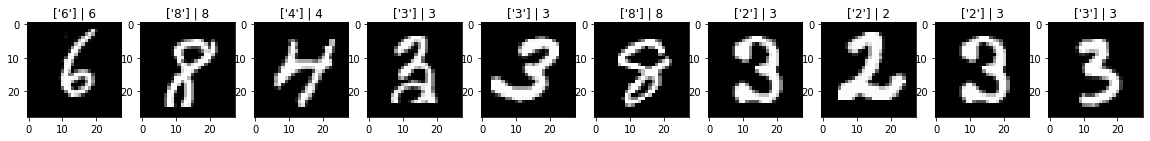

In [ ]:
from random import randint
plt.figure(figsize=(20,4))
for i in range(10):
  _index = randint(0, len(Xtest))
  _label = ytest[_index]
  _img = Xtest[_index]

  plt.subplot(1, 10, i + 1)
  _res = logReg4.predict([_img.reshape(28*28)])
  plt.title(f"{_res} | {_label}")
  plt.imshow(np.reshape(_img, (28,28)), cmap=plt.cm.gray)

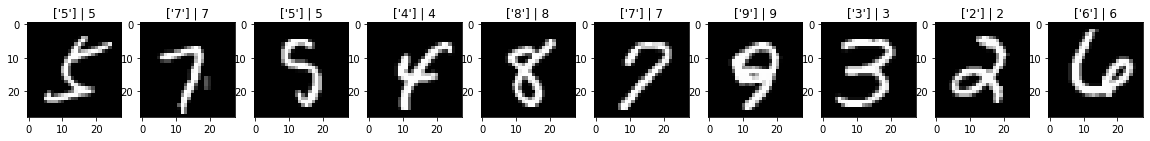

In [ ]:
from random import randint
plt.figure(figsize=(20,4))
for i in range(10):
  _index = randint(0, len(Xtest))
  _label = ytest[_index]
  _img = Xtest[_index]

  plt.subplot(1, 10, i + 1)
  _res = logReg4.predict([_img.reshape(28*28)])
  plt.title(f"{_res} | {_label}")
  plt.imshow(np.reshape(_img, (28,28)), cmap=plt.cm.gray)

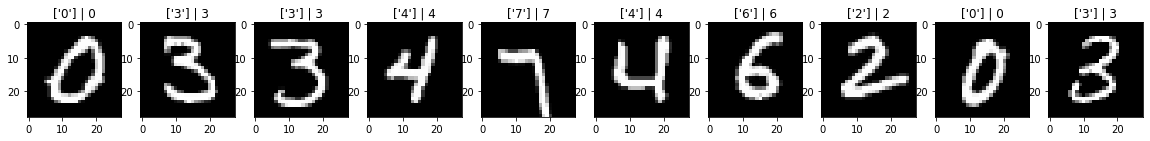

In [ ]:
from random import randint
plt.figure(figsize=(20,4))
for i in range(10):
  _index = randint(0, len(Xtest))
  _label = ytest[_index]
  _img = Xtest[_index]

  plt.subplot(1, 10, i + 1)
  _res = logReg4.predict([_img.reshape(28*28)])
  plt.title(f"{_res} | {_label}")
  plt.imshow(np.reshape(_img, (28,28)), cmap=plt.cm.gray)

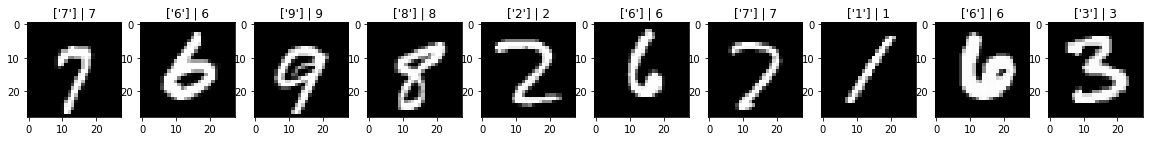

In [ ]:
from random import randint
plt.figure(figsize=(20,4))
for i in range(10):
  _index = randint(0, len(Xtest))
  _label = ytest[_index]
  _img = Xtest[_index]

  plt.subplot(1, 10, i + 1)
  _res = logReg4.predict([_img.reshape(28*28)])
  plt.title(f"{_res} | {_label}")
  plt.imshow(np.reshape(_img, (28,28)), cmap=plt.cm.gray)

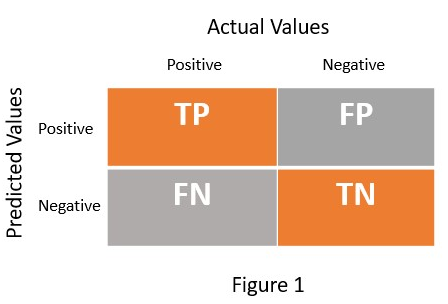

In [ ]:
Image('Sensi_Speci.png')

9 out of 100 predictions were false. That means that 91% of the predictions were right, which is really close to the model accuracy of about 91,5%.
Ok, now lets compare the logistic regression model to other classification algorithms and see how it will compete. 
With the code below we can check various parameters like:
* overall accuracy - how well the model performed overall
* precision - the accuracy for the individual predictions ( in our case the numbers 0 to 9 )
* recall:
\begin{align}
\frac {sensitivity - TP(True Positives)}{TP + FN(False Negatives)} 
\end{align}
tells you the amount of true predicted values which are actual true in relation to these values plus false negative predicted values
* f1-score:
\begin{align}
\frac {2*(precision+recall)}{(precision+recall)}
\end{align}
 if the f1-score is high does prediction and recall perform well

This gives us more opinions to choose a well fitting model for specific problems. We will compare:
* **KNN**(K-Nearest-Neighbors)
* **LDA**(LinearDiscriminantAnalysis)
* **DTC**(DecisionTreeClassifier)
* **NB** (Naive Bayes)

(In the picture above is a illustration of an binary confusion matrix which shows pretty good what TN/FN/FP/TP are)


In [ ]:
print('logReg:', classification_report(ytest, wholePredict))
print('accuracy in %:   ', score*100)

logReg:               precision    recall  f1-score   support

           0       0.97      0.97      0.97       996
           1       0.96      0.98      0.97      1141
           2       0.91      0.89      0.90      1040
           3       0.91      0.88      0.90      1013
           4       0.91      0.94      0.92       962
           5       0.88      0.87      0.88       863
           6       0.94      0.95      0.95       989
           7       0.93      0.92      0.92      1064
           8       0.88      0.89      0.89       963
           9       0.89      0.89      0.89       969

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

accuracy in %:    91.64


In [ ]:
knn = KNeighborsClassifier()
lda = LinearDiscriminantAnalysis()
dtc = DecisionTreeClassifier()
nb = GaussianNB()

knn.fit(Xtrain, ytrain)
lda.fit(Xtrain, ytrain)
dtc.fit(Xtrain, ytrain)
nb.fit(Xtrain, ytrain)

GaussianNB()

In [ ]:
wholePredictKNN = knn.predict(Xtest)
wholePredictLDA = lda.predict(Xtest)
wholePredictDTC = dtc.predict(Xtest)
wholePredictNB = nb.predict(Xtest)
print('KNN:', classification_report(ytest, wholePredictKNN))
score = knn.score(Xtest, ytest)
print('accuracy in %:   ', score*100)
print('LDA:', classification_report(ytest, wholePredictLDA))
score = lda.score(Xtest, ytest)
print('accuracy in %:   ', score*100)
print('DTC:', classification_report(ytest, wholePredictDTC))
score = dtc.score(Xtest, ytest)
print('accuracy in %:   ', score*100)
print('NB:', classification_report(ytest, wholePredictNB))
score = nb.score(Xtest, ytest)
print('accuracy in %:   ', score*100)

KNN:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       996
           1       0.97      1.00      0.98      1141
           2       0.97      0.97      0.97      1040
           3       0.97      0.96      0.97      1013
           4       0.98      0.98      0.98       962
           5       0.96      0.97      0.96       863
           6       0.98      0.99      0.98       989
           7       0.97      0.98      0.97      1064
           8       0.98      0.93      0.96       963
           9       0.96      0.97      0.96       969

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

accuracy in %:    97.27
LDA:               precision    recall  f1-score   support

           0       0.95      0.94      0.95       996
           1       0.86      0.96      0.91      1141
           2       0.91      0.80      0.85 

Overall our model performed pretty good but cant compete with the KNN model which has 5% more overall accuracy and also performed better on all other parameters. But it performed better than all other algorithms on our dataset so it might not be the best model for MNist but for some single parameter it can be a good choice.

## **Advantages/Disadvantages**

Pros: 
* **Logistic Regesion** is relativly easy to build espeacilly if you already have an linear model 
* it works really good on multiple classes like we´ve seen in our dataset and it make no assumptions about the classes in the feature space which is good for runtime and accuracy
* it performs well and fast on simple datasets and is very fast on classifying unknown datasets

Cons:
* is highly prone to overit forsome datasets(for example when there are more features than observations)
* **Logistic Regression** needs data which has a linear decision surface, otherwise it can not work. And it´s hard to collect linear separable data in real life
* it´s an relativly old algorithm which in comlex situations often cannot compete with newer and more compact algorithms

# **XGBoosting**



Different to logistic regression **XGBoosting** is a algorithm which works on decision trees. It is a further development of **Gradient Boosting** which is a decisiontree algorithm that has it´s special way to prune the branches and leafs of the tree for effectiveness. **XGBoost** does the same but uses it´s own uniqe way of pruning. And the success prove it´s right because in the last years **XGBoost** have become a really strong algorithm in terms of speed and effectiveness. It is an essemble algorithm which means that it work with different "bad models" to create a final model with very high accuracy. At first it creates pseudo residuals and a "weak model" with default values and a trainigset of data, then it prunes all the branches and leafs that are unnecessary. After that it calculate the values of the model and start over to build new residuals and a new model with the old residulals plus the new values of the model multiplied by a learning rate. The learningrate factor hold the new values small, so the new residuals are getting better, but not as fast as they would do without this factor. This helps against overfitting and delivers a really accurate "strong model" in the end. The algorithm is done either the residuals are not really changing anymore or the maximum of iterations have reached. 

Ok, now that we have an idea of what **XGBoosting** is, let´s start to build a model and test it with our **MNIST Dataset**. By the way, both **Gradient Boosting** and **XGBoosting** can be used for regression Problems and classification problems. We of course are using the classification method which is pretty similar to the regression method but uses the formula: 

\begin{align}
 \frac {\sum residuals^2}{\sum previousprobarbility * (1- previous probability)+ lambda}
 \end{align}

 Lambda here is a parameter that influences the pruning of the decisiontrees.

In [ ]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
xgb.fit(Xtrain, ytrain)

XGBClassifier(objective='multi:softprob')

In [ ]:
xgb2 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.8,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
xgb2.fit(Xtrain, ytrain)

XGBClassifier(learning_rate=0.8, objective='multi:softprob')

In [ ]:
xgb3 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=10, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
xgb3.fit(Xtrain, ytrain)

XGBClassifier(n_estimators=10, objective='multi:softprob')

In [ ]:
xgb4 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
xgb4.fit(Xtrain, ytrain)

XGBClassifier(max_depth=6, objective='multi:softprob')

In [ ]:
xgb5 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=150, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
xgb5.fit(Xtrain, ytrain)

XGBClassifier(n_estimators=150, objective='multi:softprob')

In [ ]:
xgb6 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=150, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
xgb6.fit(Xtrain, ytrain)

XGBClassifier(max_depth=6, n_estimators=150, objective='multi:softprob')

**Xgb** is the basic default XGBoost classifier. The parameters that are important to us are: 
+ **base_score:** the default score by which the algorithm starts do build the first residuals and tree
+ **gamma:** influences the split of the leafs and with that it influences pruning the tree and branches 
+ **learning_rate:** controls how big the steps to improve the residuals are
+ **n_estimators:** the number of trees build
+ **lambda&alpha:** regulation for the similarityscores of the treevalues which are important for tuning
+ **max_depth:** controls how deep a tree can build it´s branches

With the models **xgb2 - xgb6** we will change that parameters and see if we can tune tha algorithm a little bit for better accuracy.

In [ ]:
wholePredictXGB = xgb.predict(Xtest)
print('XGB:', classification_report(ytest, wholePredictXGB))
score = xgb.score(Xtest, ytest)
print('accuracy in %:   ', score*100)

XGB:               precision    recall  f1-score   support

           0       0.97      0.97      0.97       996
           1       0.96      0.98      0.97      1141
           2       0.92      0.93      0.92      1040
           3       0.93      0.88      0.91      1013
           4       0.91      0.94      0.92       962
           5       0.93      0.91      0.92       863
           6       0.96      0.96      0.96       989
           7       0.95      0.92      0.93      1064
           8       0.91      0.91      0.91       963
           9       0.87      0.89      0.88       969

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

accuracy in %:    92.95


Like already said the first model **xgb** is the default model which performs pretty good on our dataset with an overall accuracy of 92,95%. You might notice that the KNN algorithm from the chapter abover performed better but normally **XGBoost** is used by more complex problems with a lot more data and classifications to make. But maybe by tuning our algorithm we can beat the KNN algorithm anyway. 

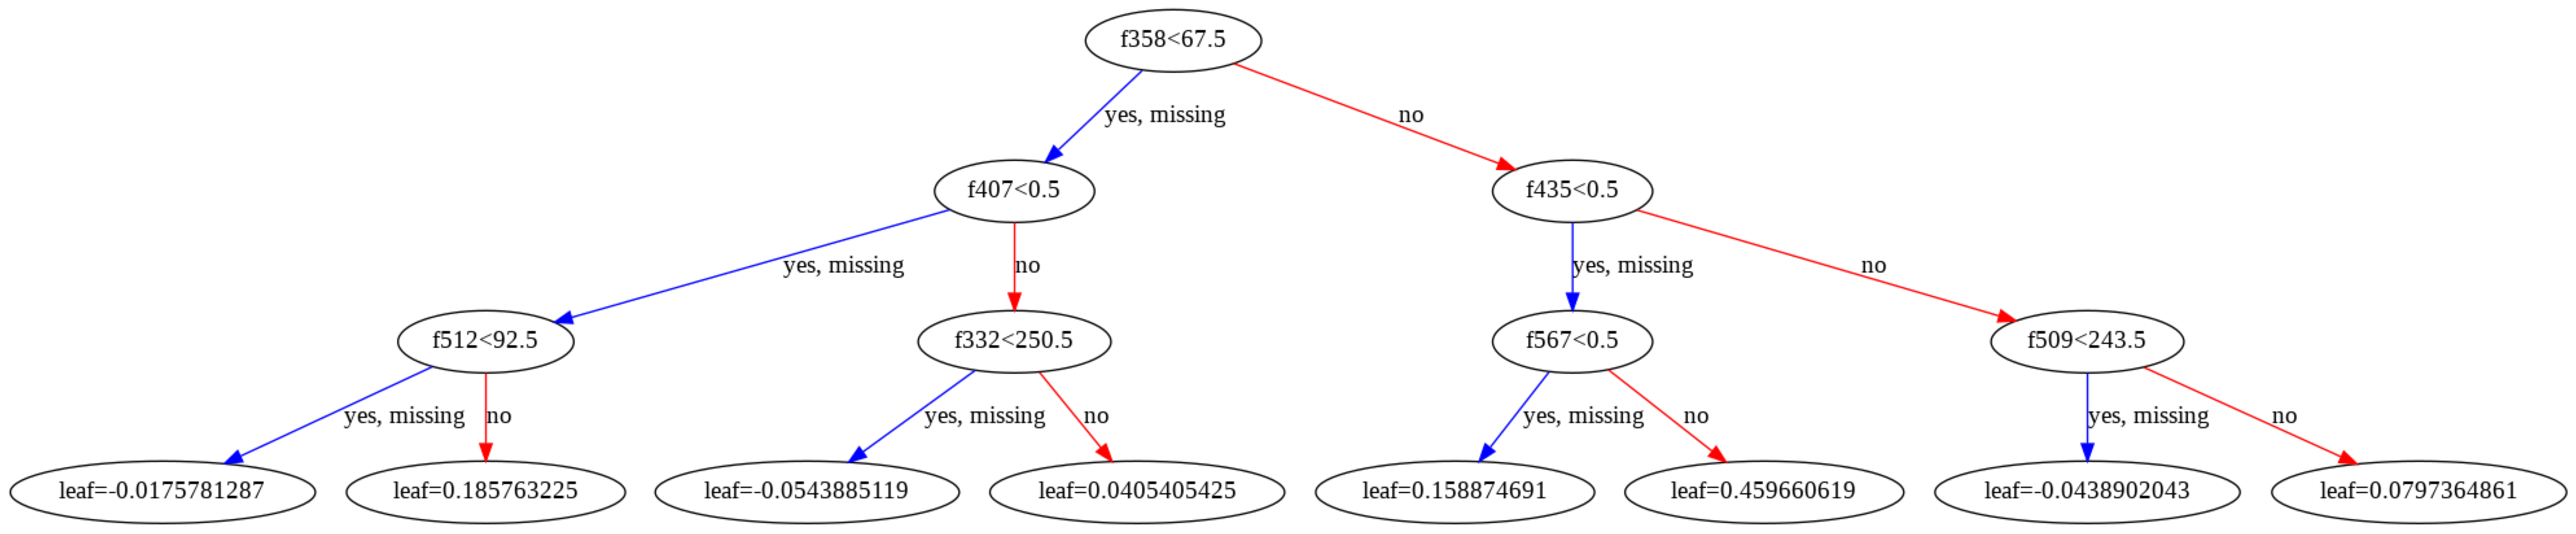

In [ ]:
plot_tree(xgb,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 40]
plt.show()

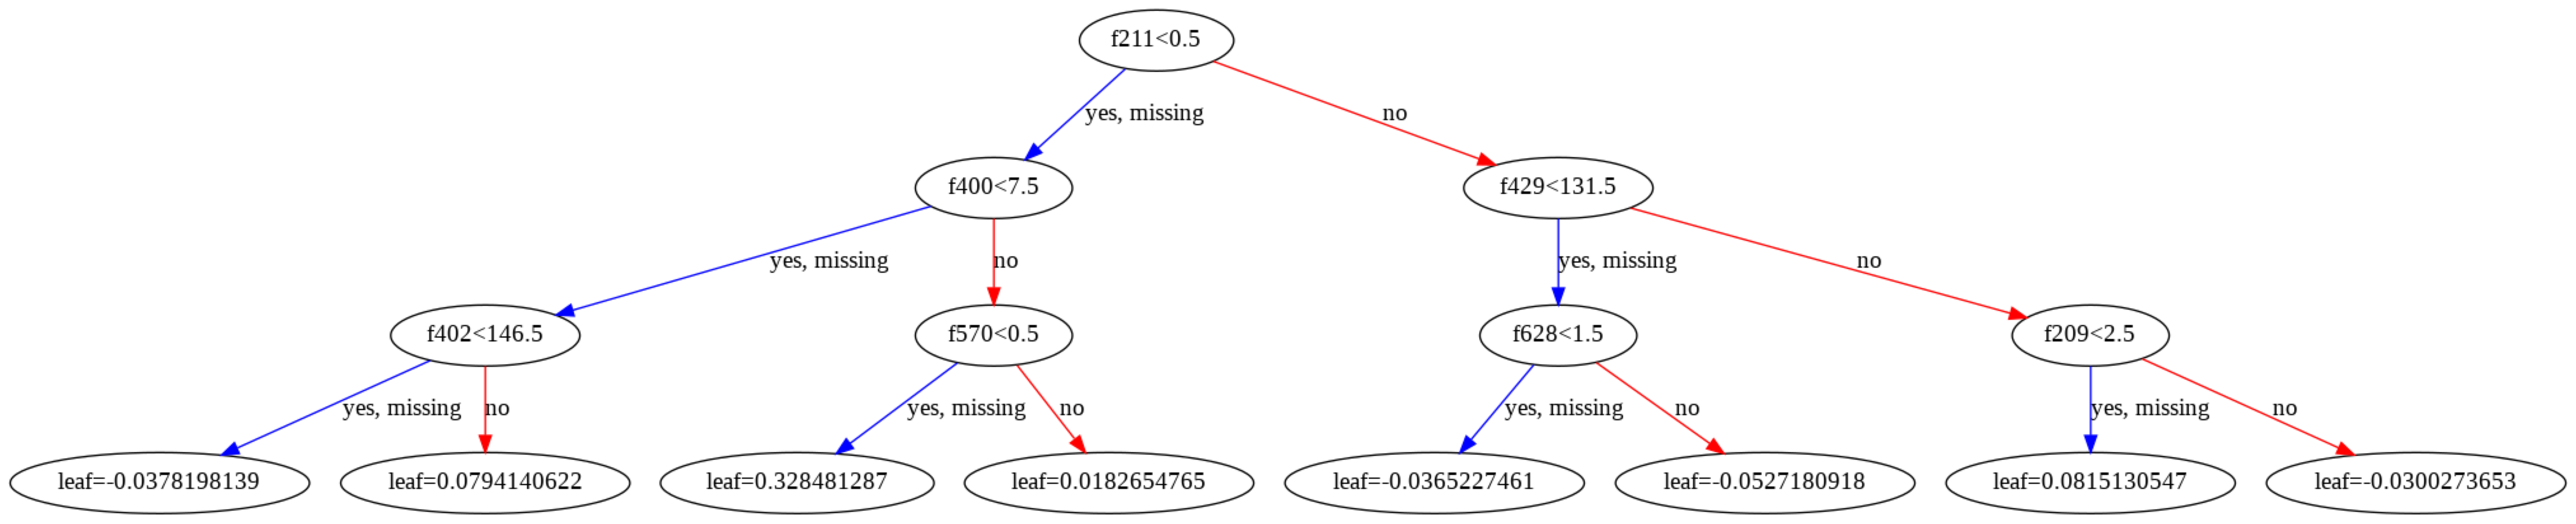

In [ ]:
plot_tree(xgb,num_trees=4)
plt.rcParams['figure.figsize'] = [100, 40]
plt.show()

Another quick interesting code is above which allows us to see the single trees of our algorithm. This is a good way to check how the values of the leafs are evolving. Here we can see the first and the fifth tree and we can notice that values are getting smaller, so more accurrate.

In [ ]:
wholePredictXGB2 = xgb2.predict(Xtest)
print('XGB2:', classification_report(ytest, wholePredictXGB2))
score = xgb2.score(Xtest, ytest)
print('accuracy in %:   ', score*100)

XGB2:               precision    recall  f1-score   support

           0       0.98      0.99      0.98       996
           1       0.99      0.99      0.99      1141
           2       0.96      0.97      0.96      1040
           3       0.97      0.95      0.96      1013
           4       0.97      0.98      0.98       962
           5       0.96      0.96      0.96       863
           6       0.98      0.98      0.98       989
           7       0.97      0.96      0.96      1064
           8       0.96      0.96      0.96       963
           9       0.96      0.96      0.96       969

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

accuracy in %:    97.03


In the second model **xgb2** we changed the learning rate to 0.8 istead of 0.1. Normally this would be bad for the overall accuracy because the steps of which the residuals grow would be to big. But in our case it made a big improvement of about 4% to 97.03% accuracy overall. A reason for this could be that our dataset is relatively small and XGBoost works better with really big datasets. 

In [ ]:
wholePredictXGB3 = xgb3.predict(Xtest)
print('XGB3:', classification_report(ytest, wholePredictXGB3))
score = xgb3.score(Xtest, ytest)
print('accuracy in %:   ', score*100)

XGB3:               precision    recall  f1-score   support

           0       0.91      0.93      0.92       996
           1       0.86      0.94      0.90      1141
           2       0.86      0.81      0.83      1040
           3       0.77      0.79      0.78      1013
           4       0.78      0.82      0.80       962
           5       0.87      0.63      0.73       863
           6       0.90      0.85      0.88       989
           7       0.87      0.83      0.85      1064
           8       0.73      0.76      0.75       963
           9       0.70      0.83      0.76       969

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000

accuracy in %:    82.28


In the third model we set the n_estimators to 10 instead of 100 which means that only 10 tress will be build in that model. And of course the model worked way worse than the default one namely 82.28% instead of 92.95%. The model probably have made to little iterations of the residuals. But what also should be mentioned, with n_estimator: 10 it took a tenth of the time to calculate the model than with 100 trees and it performed significantly better as the NB algorithm from the comparsion we made earlier.

In [ ]:
wholePredictXGB4 = xgb4.predict(Xtest)
print('XGB4:', classification_report(ytest, wholePredictXGB4))
score = xgb4.score(Xtest, ytest)
print('accuracy in %:   ', score*100)

XGB4:               precision    recall  f1-score   support

           0       0.99      0.98      0.98       996
           1       0.98      0.98      0.98      1141
           2       0.96      0.97      0.96      1040
           3       0.97      0.95      0.96      1013
           4       0.96      0.97      0.96       962
           5       0.97      0.97      0.97       863
           6       0.97      0.98      0.98       989
           7       0.97      0.96      0.96      1064
           8       0.96      0.96      0.96       963
           9       0.94      0.95      0.94       969

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

accuracy in %:    96.67


In the fourth model we double the max_depth from 3 to 6. I expected an better overall acuraccy because of the deeper branches with more accurate values and of course it worked better about 4% as the default model. But what also should be mentioned is that it took about 50% more time to calculate the model. 

In [ ]:
wholePredictXGB5 = xgb5.predict(Xtest)
print('XGB5:', classification_report(ytest, wholePredictXGB5))
score = xgb5.score(Xtest, ytest)
print('accuracy in %:   ', score*100)

XGB5:               precision    recall  f1-score   support

           0       0.97      0.98      0.98       996
           1       0.97      0.98      0.97      1141
           2       0.93      0.93      0.93      1040
           3       0.94      0.90      0.92      1013
           4       0.92      0.94      0.93       962
           5       0.93      0.93      0.93       863
           6       0.97      0.97      0.97       989
           7       0.95      0.93      0.94      1064
           8       0.93      0.93      0.93       963
           9       0.89      0.91      0.90       969

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

accuracy in %:    94.19999999999999


In the fifth  model we set the n_estimators ftom 100 to 150. As the model got worse in try **xgb3** it should be get better now. And of course it did, but only about 1.2% with a more time for calculating of about 33%.  

In [ ]:
wholePredictXGB6 = xgb6.predict(Xtest)
print('XGB6:', classification_report(ytest, wholePredictXGB6))
score = xgb6.score(Xtest, ytest)
print('accuracy in %:   ', score*100)

XGB6:               precision    recall  f1-score   support

           0       0.98      0.98      0.98       996
           1       0.98      0.98      0.98      1141
           2       0.96      0.97      0.97      1040
           3       0.98      0.95      0.96      1013
           4       0.96      0.98      0.97       962
           5       0.97      0.97      0.97       863
           6       0.98      0.98      0.98       989
           7       0.97      0.96      0.97      1064
           8       0.96      0.96      0.96       963
           9       0.94      0.95      0.95       969

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

accuracy in %:    97.04


In the sixth model we finally change two parameters, the n_estimators to 150 and the max_depth to 6. I would expect that this model works best because two strong influencing parameters are changed. And thats how it is, but only for the very small percentage of 0.01%. And the runtime for that small advantage is horribly with about 45min what is 3 times longer than the default model.

**Summary MNist dataset:** We have examine a few important possibilities to tune the XGBoost algorithm and there are a lot of more left. What we can say is that the algorithm is very flexible and in our case to manipulate the estimators and depth works best but also has a horribly runtime. So we would probibly decide to take the **xgb2** model which has almost the same accuracy but only a third of runtime with about 15min. But on every dataset this will be different so it is always important to tune it´s parameters to get the best results.  

## **Advantages/Disadvantages**

**pros:** 
+ very fast algorithm for large datasets (won a lot of competitions for example on kaggle.com in the last years)
+ easy to implement and easy to tune with not much knowlege of the depth of the algorithm 
+ very flexible for all kinds of datasets especially for those with hard classification problems because it can do both regression and classification problems


**cons:** 
+ not the best choice for small datasets, in our case the KNN algorithm does the same job in a tenth of the time as the XGBoost algorithm did
+ hard to master if you really want to understand what is all going on at the calculation and how to get the very best result out of the algorithm




##**Final words**

Both of our researched algorithms are easy to learn but hard to master machine learning algorithms. For our MNist dataset i would recommend the **Logistic Regression** because it is a lot faster than the **XGBoost** and it have nearly the same overall accuracy. But for it´s better flexibility, it´s handling with large datasets and it´s great handling with hard classification problems i would say that the **XGBoost** is the "better" algorithm overall. Also what i can read in my research is that it is recommended as one of the best **open source** **supervised learning** algorithms today.

# **Sources**

[Dataset](https://en.wikipedia.org/wiki/Overfitting)

[Logistic Regression](https://www.kaggle.com/pranjalsrv7/predict-number-using-logistic-regression-with-92)

[Logistic Regression](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/)

[Logistic Regression](https://machinelearningmastery.com/index-slice-reshape-numpy-arrays-machine-learning-python/)

[Logistic Regression](https://www.datacamp.com/community/tutorials/xgboost-in-python)

[Logistic Regression](https://www.javatpoint.com/linear-regression-vs-logistic-regression-in-machine-learning)

[Logistic Regression](https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a)

[Logistic Regression](https://www.analyticsvidhya.com/blog/2021/06/classification-problem-relation-between-sensitivity-specificity-and-accuracy/)

[Logistic Regression](https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression/)

[XGBoost](https://www.youtube.com/watch?v=3CC4N4z3GJc)

[XGBoost](https://www.youtube.com/watch?v=2xudPOBz-vs)

[XGBoost](https://www.youtube.com/watch?v=jxuNLH5dXCs)

[XGBoost](https://www.youtube.com/watch?v=OtD8wVaFm6E)

[XGBoost](https://www.youtube.com/watch?v=8b1JEDvenQU&t=1225s)

[XGBoost](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)

[XGBoost](https://www.kaggle.com/anktplwl91/mnist-xgboost)